Camera Calibration with OpenCV
===


In [14]:
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

out_dir = 'output_images/step1/'
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

### Prepare arrays to store object points and image points from all the images.

In [15]:
nx = 9 # number of inner conners along X
ny = 6 # number of inner conners along Y

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

proc_fnames = []
failed_fnames = []

for ny in [6, 5]:
    for nx in [9, 8, 7, 6]:

        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

        # Step through the list and search for chessboard corners
        for idx, fname in enumerate(images):

            if fname in proc_fnames: continue

            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)

                # Draw and display the corners
                cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                image_name = os.path.split(fname)[1]

                proc_fnames.append(fname)
                if fname in failed_fnames: failed_fnames.remove(fname)

                write_name = out_dir+'corners_found_ny'+str(ny)+'_nx'+str(nx)+'_' + image_name
                print(write_name)
                cv2.imwrite(write_name, img)
                cv2.imshow('img', img)
                cv2.waitKey(500)
            else:
                print('false: ' + fname)
                if (fname in failed_fnames) == False:
                    failed_fnames.append(fname)

cv2.destroyAllWindows()
print('Failed:')
print(failed_fnames)

false: camera_cal\calibration1.jpg
output_images/step1/corners_found_ny6_nx9_calibration10.jpg
output_images/step1/corners_found_ny6_nx9_calibration11.jpg
output_images/step1/corners_found_ny6_nx9_calibration12.jpg
output_images/step1/corners_found_ny6_nx9_calibration13.jpg
output_images/step1/corners_found_ny6_nx9_calibration14.jpg
output_images/step1/corners_found_ny6_nx9_calibration15.jpg
output_images/step1/corners_found_ny6_nx9_calibration16.jpg
output_images/step1/corners_found_ny6_nx9_calibration17.jpg
output_images/step1/corners_found_ny6_nx9_calibration18.jpg
output_images/step1/corners_found_ny6_nx9_calibration19.jpg
output_images/step1/corners_found_ny6_nx9_calibration2.jpg
output_images/step1/corners_found_ny6_nx9_calibration20.jpg
output_images/step1/corners_found_ny6_nx9_calibration3.jpg
false: camera_cal\calibration4.jpg
false: camera_cal\calibration5.jpg
output_images/step1/corners_found_ny6_nx9_calibration6.jpg
output_images/step1/corners_found_ny6_nx9_calibration7.jpg

### Test undistortion on an image

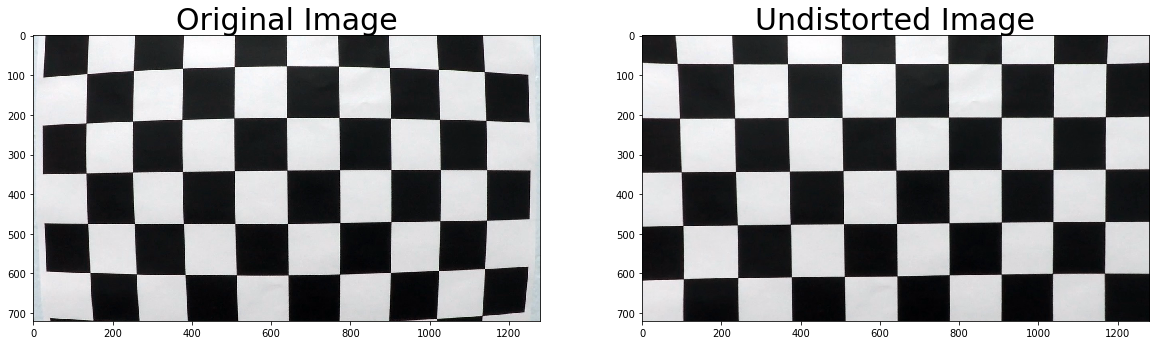

In [16]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

### Save the camera calibration result for later use (we won't worry about rvecs / tvecs)

In [17]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist_pickle.p", "wb" ) )

### Visualize undistorted images, used for camera calibration

In [18]:
# Load pickled camera matrix and distortion coefficients
with open('camera_dist_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

# Visualize undistortion
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name = os.path.split(fname)[1]
    write_name = out_dir + 'undistorted/undistorted_' + image_name
    cv2.imwrite(write_name, dst)
    print(write_name)
    cv2.imshow('dst', dst)
    cv2.waitKey(500)
    
cv2.destroyAllWindows()

output_images/step1/undistorted/undistorted_calibration1.jpg
output_images/step1/undistorted/undistorted_calibration10.jpg
output_images/step1/undistorted/undistorted_calibration11.jpg
output_images/step1/undistorted/undistorted_calibration12.jpg
output_images/step1/undistorted/undistorted_calibration13.jpg
output_images/step1/undistorted/undistorted_calibration14.jpg
output_images/step1/undistorted/undistorted_calibration15.jpg
output_images/step1/undistorted/undistorted_calibration16.jpg
output_images/step1/undistorted/undistorted_calibration17.jpg
output_images/step1/undistorted/undistorted_calibration18.jpg
output_images/step1/undistorted/undistorted_calibration19.jpg
output_images/step1/undistorted/undistorted_calibration2.jpg
output_images/step1/undistorted/undistorted_calibration20.jpg
output_images/step1/undistorted/undistorted_calibration3.jpg
output_images/step1/undistorted/undistorted_calibration4.jpg
output_images/step1/undistorted/undistorted_calibration5.jpg
output_images